# PHYS 447B: Orbital Mechanics
## Homework 8

Shelby Quiring, 10157162, Feb 20th 2023

Questions: 6.18, 6.20, 6.28

In [2]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt

### `Question 6.18`

A satellite is in elliptical orbit 1. Calculate the true anomaly θ (relative to the apse line of orbit 1) of an impulsive maneuver which rotates the apse line at an angle η counterclockwise but leaves the eccentricity and the angular momentum unchanged.

{Ans.: θ = η/2}


#### Answer 6.18

The opportunity for a single-impulse apse line rotation occurs where the apse lines intersect. Since an elliptical orbit is symmetric about its apse line, an orbit rotated by angle $\eta$ would intersect with the original orbit at a true anomaly relative to the original apse line of $\eta/2$.

### `Question 6.20`

Calculate the delta-v required at A in orbit 1 for a single impulsive maneuver to rotate the apse line 180◦ counterclockwise (to become orbit 2), but keep the eccentricity e and the angular momentum h the same.

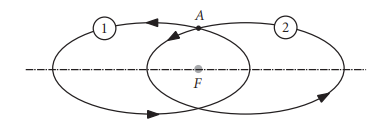

{Ans.: $\Delta v$ = 2µe/h}

#### Answer 6.20

The $\Delta v$ required is the magnitude of the vector difference between the velocities before and after the maneuver:

\begin{gather}
    \Delta v = ||\mathbf{v}_2 - \mathbf{v}_1||
\end{gather}

Note here the symmetry of the orbits. The maneuver take place at a true anomaly of $90^o$ relative to the apse line of the first orbit. The magnitude of the velocity vector after the maneuver is the same as before, since it is in a symmetric position in the orbit. However, the direction has changed. Critically, it is only the radial component of the velocity that has changed sign. Therefore:

\begin{gather}
    v_r = \frac{\mu}{h}e \sin{\theta} \\
    \therefore \Delta v = 2v_r = 2 \frac{\mu e}{h}
\end{gather}

### `Question 6.28`

A spacecraft is in a 300 km circular parking orbit. It is desired to increase the altitude to 600 km and change the inclination by 20◦. Find the total delta-v required if:

(a) the plane change is made after insertion into the 600 km orbit (so that there are a total of three delta-v burns);

(b) the plane change and insertion into the 600 km orbit are accomplished simultaneously (so that the total number of delta-v burns is two);

(c) the plane change is made upon departing the lower orbit (so that the total number of delta-v burns is two).

{Ans.: (a) 2.793 km/s; (b) 2.696 km/s; (c) 2.783 km/s}

In [31]:
# Answer 6.28

# Define inputs
G = 6.67e-11
Me = 5.972e24 # kg
mu = 398600 * 1000**3
Re = 6371e3 # m, earth radius
a1 = 300e3 # m, altitude
a2 = 600e3 # m, altitude

delta = 20 * np.pi / 180 # plane change, rad

# Calculate the radii of the initial and final orbits
r1 = Re + a1
r2 = Re + a2

# Eccentricity and angular momentum of hohmann ellipse
e = (r2 - r1) / (r2 + r1)
h = np.sqrt(r1 * mu * (1+e))

# Calculate the magnitude of the velocity in the circular orbits
v1 = np.sqrt(G*Me/r1)
v2 = np.sqrt(G*Me/r2)

# Calculate the dV for case a 
dVa_1 = h / r1 - v1 # Apogee raise
dVa_2 = h / r2 - v2 # Perigee raise
dVa_3 = v2*np.sqrt(2*(1 - np.cos(delta))) # Plane change

dVa = dVa_1 + dVa_2 + dVa_3

print(f'dVa: {np.round(dVa*1e-3,4)} [km/s]')

# Calculate the dV for case b 
V2a = np.array([0, -(h / r2), 0])
V2b = np.array([0, -v2*np.cos(delta), -v2*np.sin(delta)])

dVb_1 = h / r1 - v1
dVb_2 = np.linalg.norm(V2a - V2b)

dVb = dVb_1 + dVb_2

print(f'dVb: {np.round(dVb*1e-3,4)} [km/s]')

# Calculate the dV for case c
V1a = np.array([0, v1, 0])
V1b = np.array([0, (h / r1)*np.cos(delta), (h / r1)*np.sin(delta)])

dVc_1 = np.linalg.norm(V1a - V1b)
dVc_2 = h / r2 - v2

dVc = dVc_1 + dVc_2

print(f'dVc: {np.round(dVc*1e-3,4)} [km/s]')

# I'm not getting the same answer as the textbook here, but I think this is set up correctly.
# Answer b seems similar.



dVa: 2.6313 [km/s]
dVb: 2.6995 [km/s]
dVc: 2.6191 [km/s]
